In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# Uncomment for first use
#nltk.download('punkt')
#nltk.download('stopwords')

In [4]:
#df=pd.read_csv('../data/train.csv')
df=pd.read_csv('train.csv')

**Taget : Identify wheter the tweet is about a real disaster or not**

# Basic Data Overview

In [3]:
df.head(50)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [4]:
df.shape

(7613, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [6]:
df['keyword'].nunique()

221

In [7]:
df['location'].nunique()

3341

**First observations**
* We have 5 columns and 7613 rows
* We have some missing values in location and keyword column
* We have 221 unique keywords and more than 3000 unique locations
* Locations are in different format in some rows

# EDA

**1. Target Analysis**

<Axes: xlabel='target', ylabel='Count'>

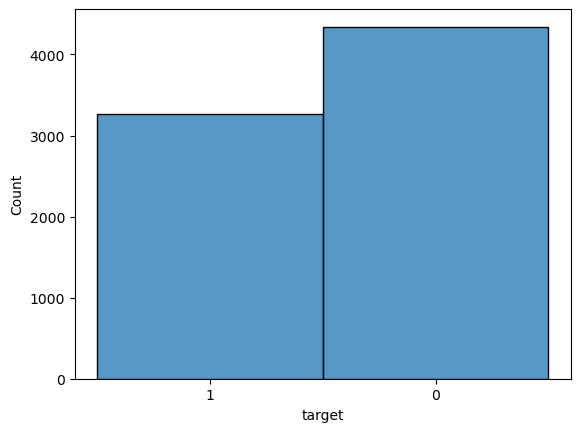

In [6]:
sns.histplot(df['target'].astype(str))

There is no class imbalance - the number of false Tweets is slightly bigger

**Number of words in caps lock vs target**

In [9]:
def count_caps_lock(text):
    words = text.split()
    caps_lock_words = [word for word in words if word.isupper()]
    return len(caps_lock_words)


In [18]:
pd.set_option('display.max_colwidth', None)

In [21]:
df['Caps_lock_word_count'] = df['text'].apply(count_caps_lock)
df[['text','Caps_lock_word_count']].head(20)

,text,Caps_lock_word_count
0,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,Forest fire near La Ronge Sask. Canada,0
2,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,0
3,"13,000 people receive #wildfires evacuation orders in California",0
4,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,0
5,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,0
6,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",0
7,I'm on top of the hill and I can see a fire in the woods...,1
8,There's an emergency evacuation happening now in the building across the street,0
9,I'm afraid that the tornado is coming to our area...,0


<Axes: xlabel='target', ylabel='Caps_lock_word_count'>

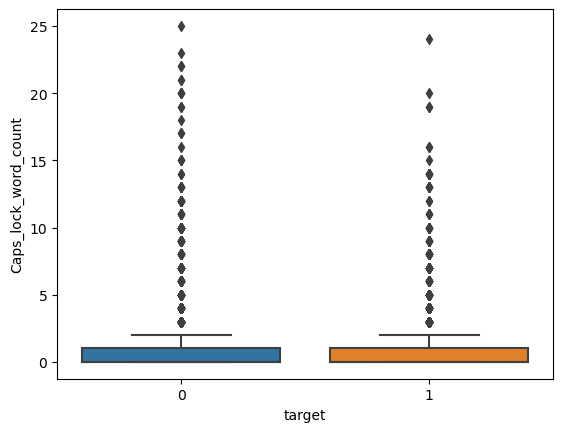

In [25]:
sns.boxplot(data=df, x='target', y='Caps_lock_word_count')

<Axes: xlabel='Caps_lock_word_count', ylabel='count'>

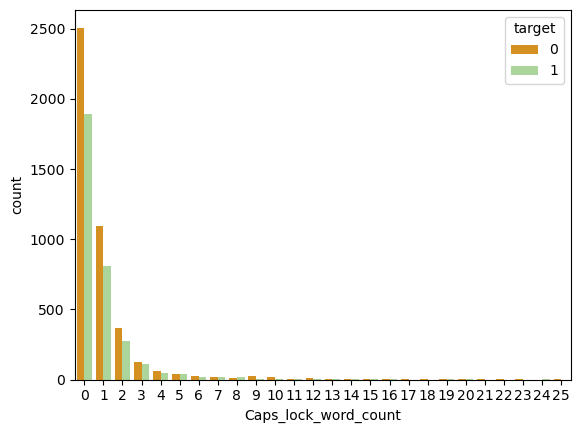

In [31]:
sns.countplot(df, x='Caps_lock_word_count',hue='target',palette=['#f19805','#a8df92'])

We can see that the majority of tweets don't have many words in caps lock. However we can see that the percentage of true tweets increases with the increase of caps lock words - more than 4 caps lock words have 50/50 false and true tweets

**Number of '!' vs target**

In [27]:
def count_exclamation_mark(text):
    return len(re.findall(r'!', text))

In [32]:
df['Number_of_exclamation'] = df['text'].apply(count_exclamation_mark)
df.head(10)

,id,keyword,location,text,target,Caps_lock_word_count,Number_of_exclamation
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,1,0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,0,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,0,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1,0,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,0,0
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1,0,0
6,10,NaN,NaN,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1,0,0
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in the woods...,1,1,0
8,14,NaN,NaN,There's an emergency evacuation happening now in the building across the street,1,0,0
9,15,NaN,NaN,I'm afraid that the tornado is coming to our area...,1,0,0


<Axes: xlabel='Number_of_exclamation', ylabel='count'>

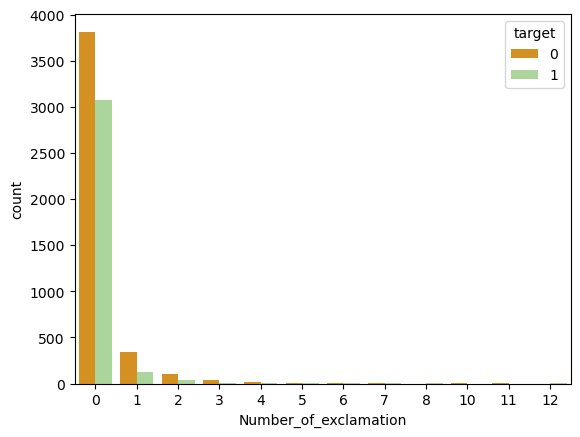

In [33]:
sns.countplot(df,x='Number_of_exclamation', hue='target',palette=['#f19805','#a8df92'])

In [35]:
pd.crosstab(df['Number_of_exclamation'], df['target'], normalize='index')*100

target,0,1
Number_of_exclamation,,
0,55.395997,44.604003
1,72.594142,27.405858
2,72.727273,27.272727
3,78.846154,21.153846
4,80.000000,20.000000
5,50.000000,50.000000
6,71.428571,28.571429
7,66.666667,33.333333
8,0.000000,100.000000


There is no obvious pattern, most tweets have 0,1,2 exclamation marks

In most groups there are more fake tweets

**Number of # vs target**

In [36]:
def count_hashtags(text):
    return len(re.findall(r'#\w+', text))

In [37]:
df['Number_of_hashtags']= df['text'].apply(count_hashtags)
df.head(20)

,id,keyword,location,text,target,Caps_lock_word_count,Number_of_exclamation,Number_of_hashtags
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,1,0,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,0,0,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,0,0,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1,0,0,1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,0,0,2
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1,0,0,3
6,10,NaN,NaN,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1,0,0,2
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in the woods...,1,1,0,0
8,14,NaN,NaN,There's an emergency evacuation happening now in the building across the street,1,0,0,0
9,15,NaN,NaN,I'm afraid that the tornado is coming to our area...,1,0,0,0


<Axes: xlabel='target', ylabel='Number_of_hashtags'>

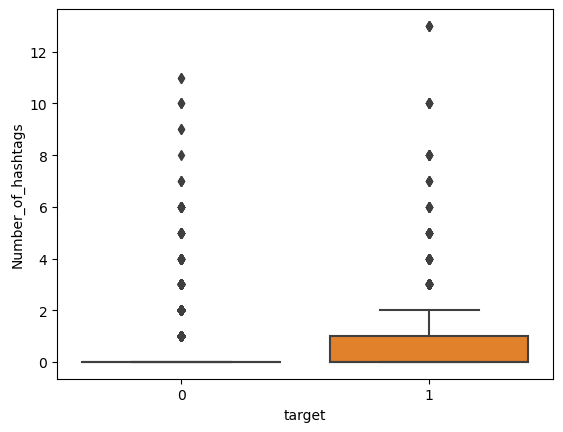

In [38]:
sns.boxplot(data=df, x='target', y='Number_of_hashtags')

<Axes: xlabel='Number_of_hashtags', ylabel='count'>

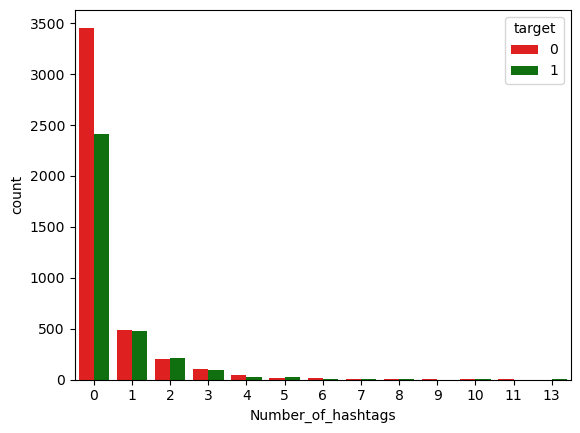

In [41]:
sns.countplot(df, x='Number_of_hashtags', hue='target', palette=['red','green'])

The majority of tweets have 0 hashtags. For 1,2,3 hashtags there are circa 50/50 false and true tweets

To add: word count, char count, punctuation count, stopword count, links count, 

**Feature correlation**

<Axes: >

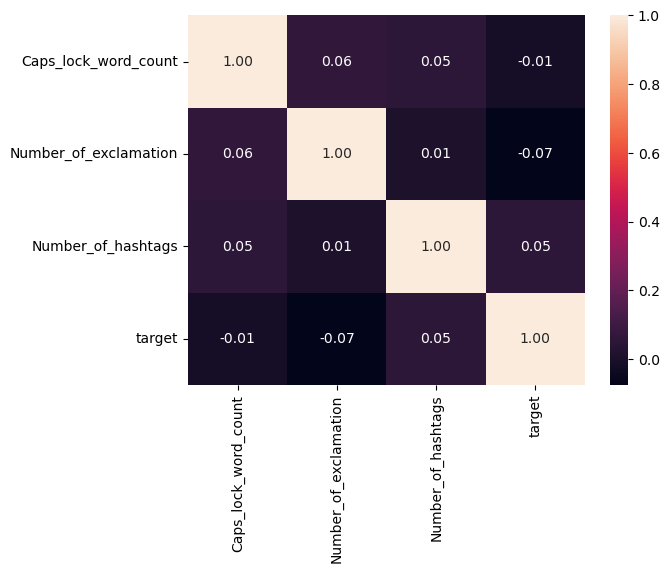

In [43]:
sns.heatmap(df[['Caps_lock_word_count','Number_of_exclamation','Number_of_hashtags','target']].corr(), annot=True, fmt='.2f')

**2. TEXT CLEANING**
* convert to lower case
* delete punctuation 
* remove https links
* remove stopwords (a, the, an ...)
+ ...

In [8]:
cleaned_text_df = df.copy()
cleaned_text_df['text'] = cleaned_text_df['text'].apply(lambda x : " ".join(word.lower() for word in x.split()))  #to lower case
cleaned_text_df['text'] = cleaned_text_df['text'].apply(lambda line: re.sub(r'[^\w\s]', repl='', string=line)) #removing punctuation
cleaned_text_df['text']


0       our deeds are the reason of this earthquake ma...
1                   forest fire near la ronge sask canada
2       all residents asked to shelter in place are be...
3       13000 people receive wildfires evacuation orde...
4       just got sent this photo from ruby alaska as s...
                              ...                        
7608    two giant cranes holding a bridge collapse int...
7609    aria_ahrary thetawniest the out of control wil...
7610    m194 0104 utc5km s of volcano hawaii httptcozd...
7611    police investigating after an ebike collided w...
7612    the latest more homes razed by northern califo...
Name: text, Length: 7613, dtype: object

In [9]:
# Removing https links 
def remove_links(text):
    # Define the pattern for detecting URLs
    url_pattern = r'https\S+'
    
    # Replace URLs with an empty string
    text_without_links = re.sub(url_pattern, '', text)
    
    return text_without_links

cleaned_text_df['text']=cleaned_text_df['text'].apply(remove_links)

In [13]:
# Tokenizing the whole sentence
def tokenize_sentence(sentence):
    return word_tokenize(sentence)

# Applying tokenization to our dataset
cleaned_text_df['tokenized_text'] = cleaned_text_df['text'].apply(tokenize_sentence)

# Assigning all stop words
stop_words = set(stopwords.words('english'))

# Filtering all stop words in each sentence
def filter_stop_words(tokenized_tweet):
    return [word for word in tokenized_tweet if word not in stop_words]

# Applying changes to the 'tokenized_tweet' column
cleaned_text_df['tokenized_text'] = cleaned_text_df['tokenized_text'].apply(filter_stop_words)

# Joining the tokenized words back into sentences
cleaned_text_df['text'] = cleaned_text_df['tokenized_text'].apply(lambda x: ' '.join(x))

cleaned_text_df['tokenized_text']

0       [deeds, reason, earthquake, may, allah, forgiv...
1           [forest, fire, near, la, ronge, sask, canada]
2       [residents, asked, shelter, place, notified, o...
3       [13000, people, receive, wildfires, evacuation...
4       [got, sent, photo, ruby, alaska, smoke, wildfi...
                              ...                        
7608    [two, giant, cranes, holding, bridge, collapse...
7609    [aria_ahrary, thetawniest, control, wild, fire...
7610    [m194, 0104, utc5km, volcano, hawaii, httptcoz...
7611    [police, investigating, ebike, collided, car, ...
7612    [latest, homes, razed, northern, california, w...
Name: tokenized_text, Length: 7613, dtype: object